In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image
# import mpldatacursor

from PIL import Image
from PyPDF2 import PdfReader
from matplotlib.widgets import Cursor, SpanSelector

# import pytesseract
import easyocr
import keras_ocr
from keras_ocr.tools import drawAnnotations
import re
import os
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")



### Extracting Images from the PDF

In [2]:
def extract_images_from_pdf(pdf_path, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Load the PDF file
    pdf_reader = PdfReader(pdf_path)

    # Loop through each page of the PDF
    for page_number, page in enumerate(pdf_reader.pages):
        # Extract images from the page
        xObject = page['/Resources']['/XObject'].get_object()
        image_counter = 0

        for obj in xObject:
            if xObject[obj]['/Subtype'] == '/Image':
                size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                data = xObject[obj].get_object()

                if '/Filter' in data:
                    if data['/Filter'] == '/FlateDecode':
                        img = Image.frombytes('RGB', size, data.get_data())
                        img.save(os.path.join(output_folder, f"page_{page_number + 1}_image_{image_counter}.png"))
                        image_counter += 1
                    elif data['/Filter'] == '/DCTDecode':
                        img = open(os.path.join(output_folder, f"page_{page_number + 1}_image_{image_counter}.jpg"), "wb")
                        img.write(data.get_data())
                        img.close()
                        image_counter += 1


In [3]:
current_path=os.getcwd()
pdf_file_path = os.path.join(current_path,"data","Jewelosco.pdf")
output_image_folder_path = os.path.join(current_path,"output")

extract_images_from_pdf(pdf_file_path, output_image_folder_path)

### EasyOCR

In [4]:
image_files = glob('C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output/*')

In [5]:
reader = easyocr.Reader(['en'])
# reader = easyocr.Reader(['en'], gpu = True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
for image_name in image_files:
    print(image_name)

C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_10_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_11_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_12_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_13_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_1_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_2_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_3_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_4_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_5_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_6_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_7_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_8_image_0.jpg
C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\page_9_image_0.jpg


In [7]:
image_files[0]

'C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output\\page_10_image_0.jpg'

page_10_image_0.jpg
page_11_image_0.jpg
305 302
['DIGitAL COUPON']
[0.9786845459392917]
306 303
['DIGitAL COUPON', 'DIGitaL CouPOn']
[0.9786845459392917, 0.3864175817396473]
(3, 4)


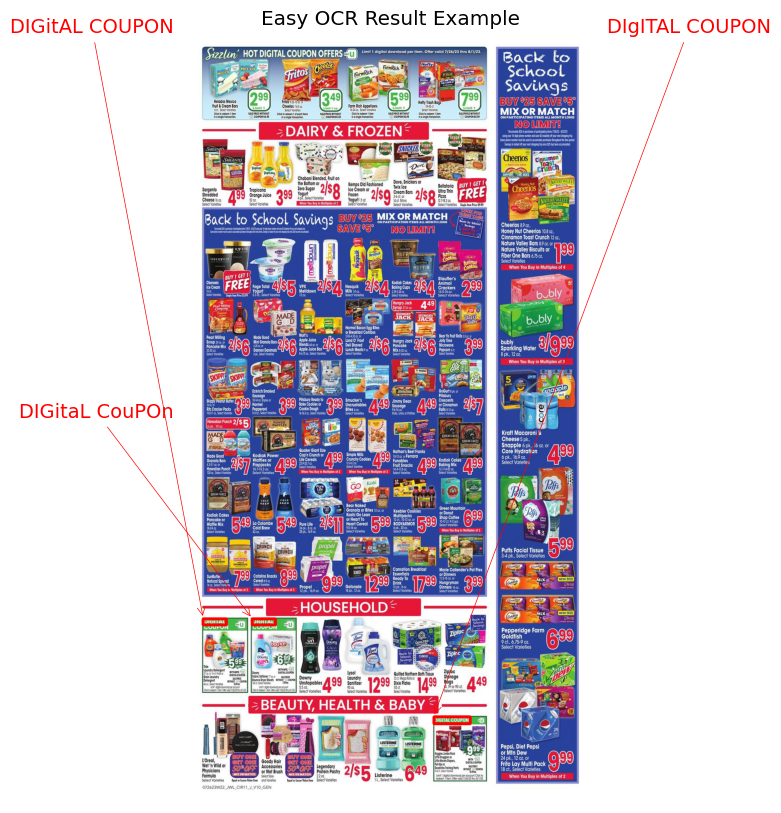

                                                     bbox            text      conf page_number
302      [[23, 1363], [77, 1363], [77, 1377], [23, 1377]]  DIGitAL COUPON  0.978685          11
303  [[137, 1363], [191, 1363], [191, 1377], [137, 1377]]  DIGitaL CouPOn  0.386418          11
342  [[559, 1591], [643, 1591], [643, 1607], [559, 1607]]  DIgITAL COUPON  0.369390          11
page_12_image_0.jpg
page_13_image_0.jpg
page_1_image_0.jpg
page_2_image_0.jpg
(1, 4)


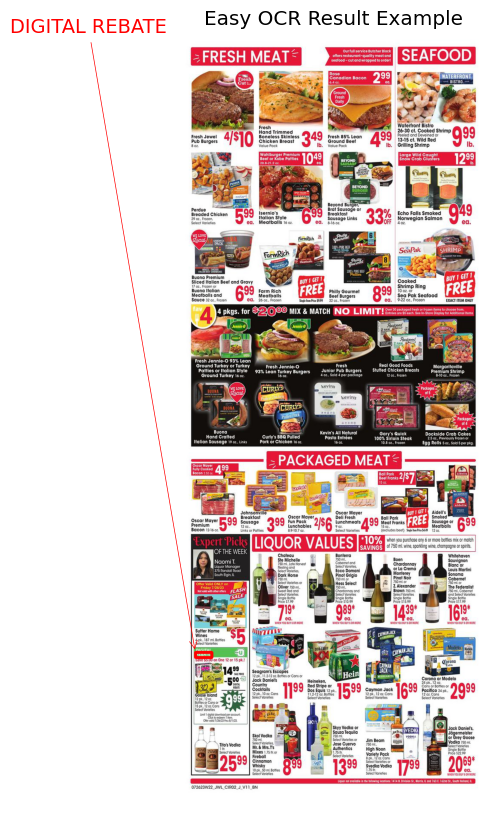

                                                 bbox            text      conf page_number
242  [[31, 1441], [69, 1441], [69, 1453], [31, 1453]]  DIGITAL REBATE  0.940066           2
page_3_image_0.jpg
(1, 4)


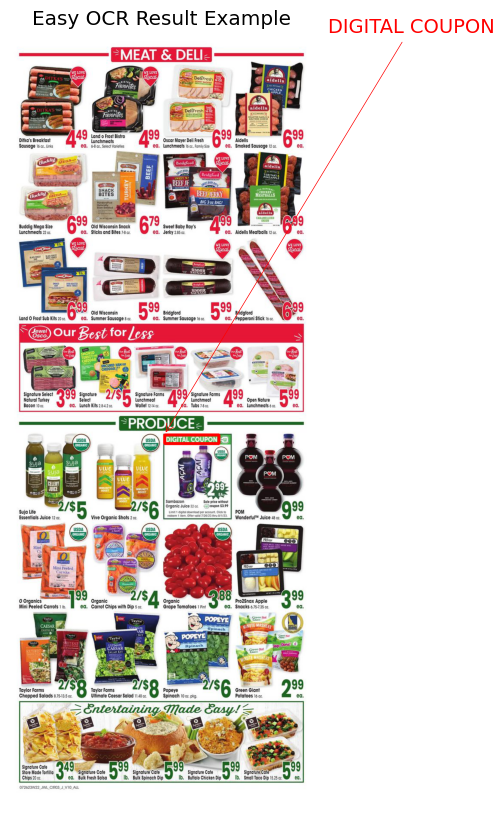

                                                bbox            text      conf page_number
96  [[359, 935], [485, 935], [485, 955], [359, 955]]  DIGITAL COUPON  0.818094           3
page_4_image_0.jpg
page_5_image_0.jpg
279 277
['DIghAl COUPON']
[0.612128262933616]
280 278
['DIghAl COUPON', 'DIGgal COUPON']
[0.612128262933616, 0.9747818809735463]
(5, 4)


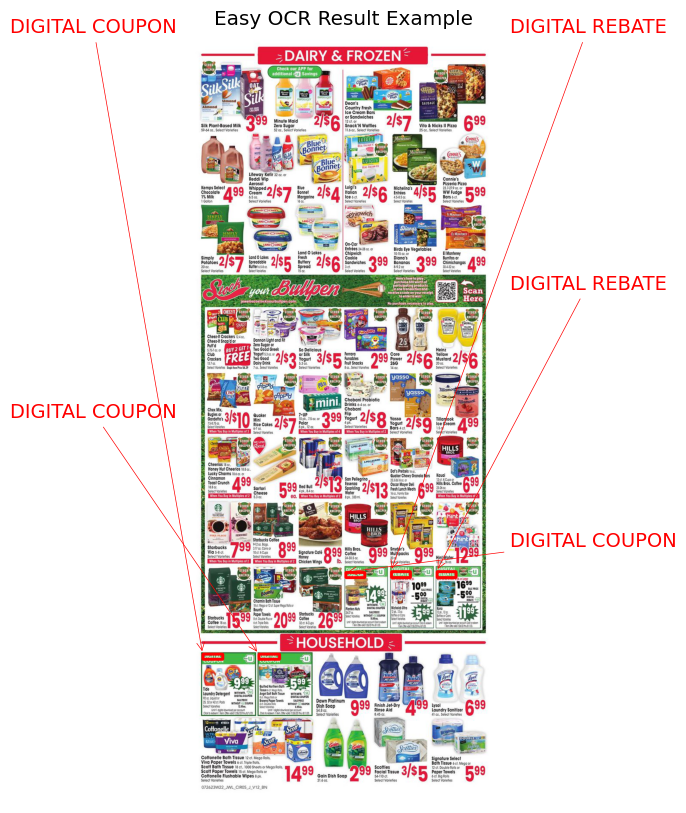

                                                     bbox            text      conf page_number
253  [[357, 1255], [401, 1255], [401, 1267], [357, 1267]]  DIGITAL COUPON  0.987229           5
254  [[463, 1253], [507, 1253], [507, 1267], [463, 1267]]  DIGITAL REBATE  0.838415           5
255  [[569, 1253], [613, 1253], [613, 1267], [569, 1267]]  DIGITAL REBATE  0.532097           5
277      [[25, 1445], [71, 1445], [71, 1457], [25, 1457]]  DIGITAL COUPON  0.612128           5
278  [[155, 1445], [203, 1445], [203, 1457], [155, 1457]]  DIGITAL COUPON  0.974782           5
page_6_image_0.jpg
page_7_image_0.jpg
246 242
['DIGgial COUpOn']
[0.3006323109152108]
293 291
['DIGgial COUpOn', 'digital REBATE']
[0.3006323109152108, 0.9929576568689874]
(2, 4)


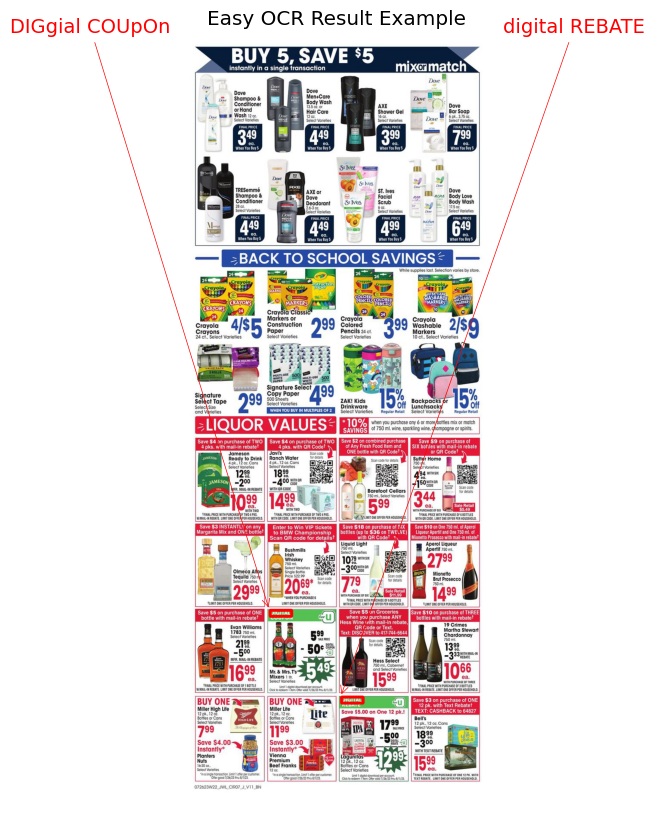

                                                     bbox            text      conf page_number
242  [[195, 1343], [245, 1343], [245, 1357], [195, 1357]]  DIGgial COUpOn  0.300632           7
291  [[361, 1545], [411, 1545], [411, 1559], [361, 1559]]  digital REBATE  0.992958           7
page_8_image_0.jpg
page_9_image_0.jpg
done


In [8]:
final_df= pd.DataFrame( columns=['bbox', 'text', 'conf'])
for i in range(len (image_files)):
    image_no=i
    img_name_temp=str(image_files[i].split('\\')[-1]).split('.')[0]
    results = reader.readtext(image_files[image_no])


    # Create the DataFrame
    bbox_df = pd.DataFrame(results, columns=['bbox', 'text', 'conf'])

    # Convert the 'text' column to lowercase and filter rows where the lowercase text starts with the strings
    filtered_df = bbox_df[bbox_df['text'].str.lower().str.startswith(('digh', 'reb', 'digital', 'coup', 'dig'), na=False)]

    strings_list = ['digital rebate', 'digital coupon']

    # Find the maximum length among the given strings
    max_length = max(len(s) for s in strings_list)

    # Filter the DataFrame based on the maximum length
    filtered_df = filtered_df[filtered_df['text'].str.len() <= max_length]

    import re

    img_id = image_files[image_no].split('\\')[-1]
    print(img_id)
    # Use regular expression to extract the number after "page_"
    page_number = re.search(r'page_(\d+)', img_id).group(1)
    filtered_df['page_number'] = page_number


    #### Checking if the strings are close to one another , if yes then merge it
    # **Calculated the central distance**

    def horizontal_distance(bbox1, bbox2):
        x1, y1 = bbox1[0]
        x2, y2 = bbox1[1]
        x3, y3 = bbox2[0]
        x4, y4 = bbox2[1]

        center1_x = (x1 + x2) / 2
        center2_x = (x3 + x4) / 2
        return abs(center1_x - center2_x)

        # Function to check if the second word is not 'coupon' or 'rebate'
    def check_second_word(text):
        words = text.lower().split()
        if len(words)==2:
            return words[1] in ['coupon', 'rebate']
        else:
            return True

    def check_length(text):
        w_text = text.lower().split()
        words = max(len('coupon'), len('rebate'), len('digital'))
        # print('Threshold length:',words)
        if len(w_text) == 1:
            # print('Actual Word Length:', len(w_text[0]))
            return len(w_text[0])<=words
        else:
            return True
    
    
    if not filtered_df.empty:
        # Filtering out records with "coupon" or "rebate" in the second string
        filtered_df = filtered_df[filtered_df['text'].apply(check_second_word)]
        # Apply the function on 'text_column' and create a boolean mask
        filtered_df = filtered_df[filtered_df['text'].apply(check_length)]

        
    # Group bounding boxes that are close horizontally and aggregate the 'text' column as a single string
    grouped_text = []
    grouped_conf = []
    grouped_indices = []  # To keep track of already grouped indices
    group_threshold = 20  # Adjust this threshold as needed based on the data

    for idx, row in filtered_df.iterrows():
        if idx in grouped_indices:
            continue  # Skip if the current row is already grouped

        text = row['text']
        conf = row['conf']
        grouped = False

        # Group rows that are close horizontally
        group_rows = [idx]  # List to hold the indices of the grouped rows
        for _, row2 in filtered_df.iterrows():
            if _ == idx or _ in grouped_indices:
                continue  # Skip if the current row is itself or already grouped
            if horizontal_distance(row['bbox'], row2['bbox']) <= group_threshold:
                print(_, idx)
                text += ' ' + row2['text']
                filtered_df.at[idx, 'text'] = text
                filtered_df = filtered_df.drop(_)

                conf = max(conf, row2['conf'])
                filtered_df.at[idx, 'conf'] = conf
                grouped_indices.append(_)
                group_rows.append(_)
                grouped = True

        if grouped:
            grouped_text.append(text)
            grouped_conf.append(conf)
            grouped_indices.append(idx)
            print(grouped_text)
            print(grouped_conf)

    grouped_data = {'text': grouped_text, 'conf': grouped_conf}
    grouped_df = pd.DataFrame(grouped_data)

#     print(filtered_df.columns)
    
    

        
    replace_mapping = {
        'COUPON': 'DIGITAL COUPON',
        'REBATE': 'DIGITAL REBATE',
        'DIghAl COUPON': 'DIGITAL COUPON',
        'DIGgal COUPON': 'DIGITAL COUPON',

    }
    
    if not filtered_df.empty:
        filtered_df['text'] = filtered_df['text'].replace(replace_mapping)
        print(filtered_df.shape)


        #////////////////////////////////img   

        fig, ax = plt.subplots(figsize=(10, 10))
        easy_results = filtered_df[['text','bbox']].values.tolist()
        # print(easy_results)

        easy_results = [(x[0], np.array(x[1])) for x in easy_results]
        # print(easy_results)

        keras_ocr.tools.drawAnnotations(plt.imread(image_files[image_no]), easy_results, ax=ax)

        ax.set_title('Easy OCR Result Example')

        # Save the annotated image with improved quality
        output_file = 'C:/Users/pmehra/Desktop/ocr/Adhoc-image-project/output_easy_ocr/annotated_'+img_name_temp+'.jpg'
        plt.savefig(output_file, dpi=300)

        plt.show()
        print(filtered_df.head(20))

        final_df = final_df.append(filtered_df, ignore_index=True)


print('done')


In [9]:
final_df.shape

(12, 4)

In [10]:
final_df['text'] = final_df['text'].str.upper()


In [11]:
final_df

,bbox,text,conf,page_number
0,"[[23, 1363], [77, 1363], [77, 1377], [23, 1377]]",DIGITAL COUPON,0.978685,11
1,"[[137, 1363], [191, 1363], [191, 1377], [137, 1377]]",DIGITAL COUPON,0.386418,11
2,"[[559, 1591], [643, 1591], [643, 1607], [559, 1607]]",DIGITAL COUPON,0.369390,11
3,"[[31, 1441], [69, 1441], [69, 1453], [31, 1453]]",DIGITAL REBATE,0.940066,2
4,"[[359, 935], [485, 935], [485, 955], [359, 955]]",DIGITAL COUPON,0.818094,3
5,"[[357, 1255], [401, 1255], [401, 1267], [357, 1267]]",DIGITAL COUPON,0.987229,5
6,"[[463, 1253], [507, 1253], [507, 1267], [463, 1267]]",DIGITAL REBATE,0.838415,5
7,"[[569, 1253], [613, 1253], [613, 1267], [569, 1267]]",DIGITAL REBATE,0.532097,5
8,"[[25, 1445], [71, 1445], [71, 1457], [25, 1457]]",DIGITAL COUPON,0.612128,5
9,"[[155, 1445], [203, 1445], [203, 1457], [155, 1457]]",DIGITAL COUPON,0.974782,5


In [12]:
# replace_mapping = {
# 'COUPON VARIES COUPOM VARIES': 'DIGITAL COUPON',
# 'COUPONAA': 'DIGITAL COUPON'
# }

# final_df['text'] = final_df['text'].replace(replace_mapping)


In [13]:
final_df

,bbox,text,conf,page_number
0,"[[23, 1363], [77, 1363], [77, 1377], [23, 1377]]",DIGITAL COUPON,0.978685,11
1,"[[137, 1363], [191, 1363], [191, 1377], [137, 1377]]",DIGITAL COUPON,0.386418,11
2,"[[559, 1591], [643, 1591], [643, 1607], [559, 1607]]",DIGITAL COUPON,0.369390,11
3,"[[31, 1441], [69, 1441], [69, 1453], [31, 1453]]",DIGITAL REBATE,0.940066,2
4,"[[359, 935], [485, 935], [485, 955], [359, 955]]",DIGITAL COUPON,0.818094,3
5,"[[357, 1255], [401, 1255], [401, 1267], [357, 1267]]",DIGITAL COUPON,0.987229,5
6,"[[463, 1253], [507, 1253], [507, 1267], [463, 1267]]",DIGITAL REBATE,0.838415,5
7,"[[569, 1253], [613, 1253], [613, 1267], [569, 1267]]",DIGITAL REBATE,0.532097,5
8,"[[25, 1445], [71, 1445], [71, 1457], [25, 1457]]",DIGITAL COUPON,0.612128,5
9,"[[155, 1445], [203, 1445], [203, 1457], [155, 1457]]",DIGITAL COUPON,0.974782,5


In [14]:
coupon_counts_per_page = final_df.groupby(['page_number', 'text'])['text'].count().reset_index(name='count')


In [15]:
coupon_counts_per_page

,page_number,text,count
0,11,DIGITAL COUPON,3
1,2,DIGITAL REBATE,1
2,3,DIGITAL COUPON,1
3,5,DIGITAL COUPON,3
4,5,DIGITAL REBATE,2
5,7,DIGGIAL COUPON,1
6,7,DIGITAL REBATE,1


In [16]:
# coupon_counts_per_page.to_excel('output_result.xlsx',index=False)

In [1]:
# 765432134567897743234567890453

In [2]:
a=max(len('coupon'), len('rebate'), len('digital'))

In [3]:
a

7

In [8]:
import re

In [9]:
img_id="page_1_image_0.jpg"
page_number = re.search(r'page_(\d+)', img_id).group(1)

In [10]:
page_number

'1'

In [11]:
word_count=[3,4,5,7,1]
has_second_string = word_count == 2
print(has_second_string)

False
